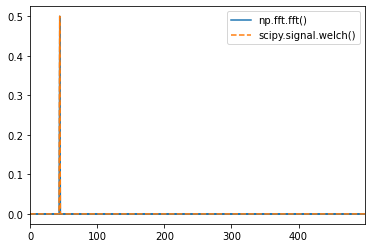

In [46]:
import numpy as np
import scipy.signal

import matplotlib.pyplot as plt


def abs2(x):
    return x.real**2 + x.imag**2

if __name__ == '__main__':
    framelength=1.0
    N=1000
    x=np.linspace(0,framelength,N,endpoint=False)
    y=np.sin(44*2*np.pi*x)
    y2 = np.sin(21*np.pi*x)
    #y=y-np.mean(y)
    ffty=np.fft.rfft(y)
    #power spectrum, after real2complex transfrom (factor )
    scale=2.0/(len(y)*len(y))
    power=scale*abs2(ffty)
    freq=np.fft.fftfreq(len(y) , framelength/len(y) )

    # power spectrum, via scipy welch. 'boxcar' means no window, nperseg=len(y) so that fft computed on the whole signal.
    freq2,power2=scipy.signal.welch(y, fs=len(y)/framelength,window='boxcar',nperseg=len(y),scaling='spectrum', axis=-1, average='mean')

    #for i in range(len(freq2)):
    #    print(i, freq2[i], power2[i], freq[i], power[i])
    #print(np.sum(power2))


    plt.figure()
    plt.plot(freq[0:int(len(y)/2+1)],power[0:int(len(y)/2+1)],label='np.fft.fft()')
    plt.plot(freq2,power2,label='scipy.signal.welch()', linestyle='--')
    plt.legend()
    plt.xlim(0,np.max(freq[0:int(len(y)/2+1)]))


500000.0
500000.0000000001


/homes/metofac/wenegrat/miniconda3/envs/WHITESHARK/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


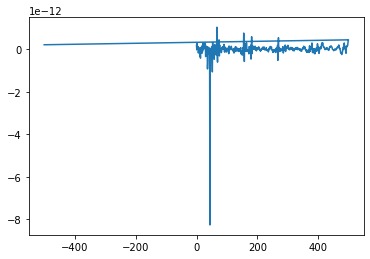

In [50]:
rffty=np.fft.rfft(y)
ffty=np.fft.fft(y)

plt.plot(freq[:],ffty[:],label='np.fft.fft()')
plt.plot(freq[0:int(len(y)/2+1)],rffty[0:int(len(y)/2+1)],label='np.fft.fft()')

print(np.sum((rffty*np.conj(rffty)).real)*2) # power spectrum
print(np.sum((ffty*np.conj(ffty)).real))

In [63]:
print(np.sum((rffty.imag)*2)) # power spectrum
print(np.sum((ffty.imag)))

-1000.0000000000458
5.684341886080802e-14


500000.0000000001

2.188537015231624e-10
2.08068058549855e-10


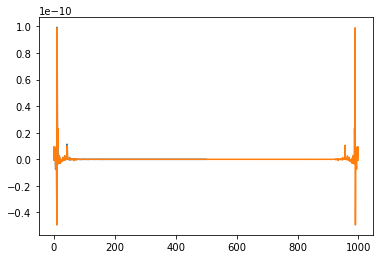

In [56]:
rffty=np.fft.rfft(y)
rffty2=np.fft.rfft(y2)

ffty=np.fft.fft(y)
ffty2=np.fft.fft(y2)

print(np.sum((rffty[:]*np.conj(rffty2[:])).real)*2) # power spectrum
print(np.sum((ffty*np.conj(ffty2)).real)) # power spectrum

plt.plot((rffty[:]*np.conj(rffty2[:])).real)
plt.plot((ffty*np.conj(ffty2)).real)

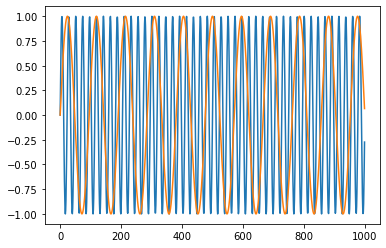

In [57]:
plt.plot(y)
plt.plot(y2)

## Try 2D

<ipython-input-90-9c1bf688a534>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y, signal2)


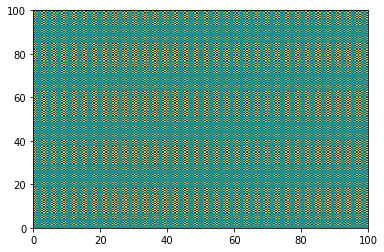

In [90]:
x = np.linspace(0, 100, 200)
y = np.linspace(0, 100, 400)

X,Y = np.meshgrid(x,y)

signal = np.cos(44*2*np.pi*X)*np.sin(27*2*np.pi*Y)
signal2 = np.cos(33*2*np.pi*X)*np.cos(27*2*np.pi*Y)

plt.pcolor(X,Y, signal2)

<ipython-input-92-97fb6615def6>:10: RuntimeWarning: invalid value encountered in log10
  plt.pcolor(np.log10(cospecr))
<ipython-input-92-97fb6615def6>:13: RuntimeWarning: invalid value encountered in log10
  plt.pcolor(np.log10(cospec))


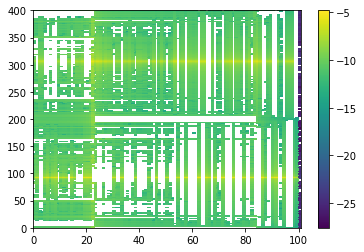

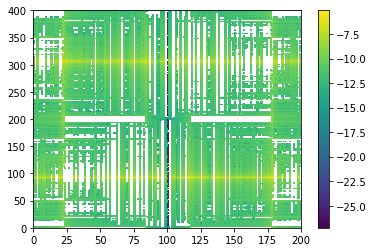

In [92]:
# PSD
phir = np.fft.rfft2(signal)
phir2 = np.fft.rfft2(signal2)
phi = np.fft.fft2(signal)
phi2 = np.fft.fft2(signal2)

cospecr = (phir*np.conj(phir2)).real*2
cospec = (phi*np.conj(phi2)).real

plt.pcolor(np.log10(cospecr))
plt.colorbar()
plt.figure()
plt.pcolor(np.log10(cospec))
plt.colorbar()

<ipython-input-100-5504b2b3f36a>:1: RuntimeWarning: divide by zero encountered in log10
  plt.pcolor(np.log10(cospecr/2 - cospec[:,0:101]))
<ipython-input-100-5504b2b3f36a>:1: RuntimeWarning: invalid value encountered in log10
  plt.pcolor(np.log10(cospecr/2 - cospec[:,0:101]))


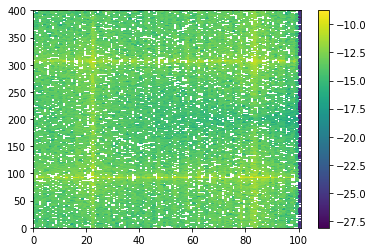

In [100]:


plt.pcolor(np.log10(cospecr/2 - cospec[:,0:101]))
plt.colorbar()

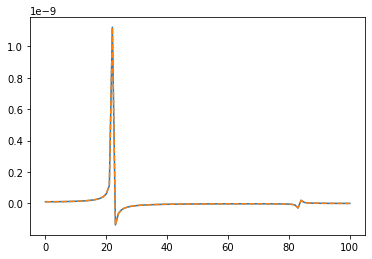

In [99]:
plt.plot(cospecr[0,:]/2)
plt.plot(cospec[0,0:101], linestyle='--')

In [88]:
cospecr.shape

(1000, 101)